As the coronavirus outbreak continues to spread in the country, the question that we as Indians are trying to answer is :

"Will India be able to tackle this pandemic or are we going to witness another Italy/ S.Korea/ USA/ Spain?"

Goal:
We need a strong model that predicts how the virus could spread across different countries and regions. The goal of this task is to build a model that predicts the spread of the virus in the next 7 days.

Tasks to be performed:
<li>Analysing the present condition in India
<li>Is this trend similar to Italy/ S.Korea/ USA/ Spain
<li>Exploring the world wide data
<li>Forecasting the world wide COVID-19 cases using Prophet

### Import the Libraries

In [22]:
#pip install plotly

  Stored in directory: C:\Users\91758\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [24]:
#pip install folium

Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

### Reading the Datasets

In [2]:
#Learn how to read a .xls file by creating a dataframe using pandas
# Reading the datasets
df= pd.read_excel(r'C:\Users\91758\Downloads\Covid 19 Outbreak\Covid cases in India.xlsx')
df_india = df.copy()
df

,S. No.,Name of State / UT,Total_Confirmed_cases,Cured,Death
0,1,Andhra Pradesh,1887,847,41
1,2,Bihar,580,267,5
2,3,Chhattisgarh,59,38,0
3,4,Delhi,6318,2020,68
4,5,Gujarat,7403,1872,449
5,6,Haryana,653,279,9
6,7,Himachal Pradesh,50,34,3
7,8,Karnataka,789,379,30
8,9,Kerala,504,484,4
9,10,Madhya Pradesh,3341,1349,200


In [3]:
# Coordinates of India States and Union Territories
India_coord = pd.read_excel('C:/Users/91758/Downloads/Covid 19 Outbreak/Indian Coordinates.xlsx')

In [4]:
#Day by day data of India, Korea, Italy, USA and Spain
dd= pd.read_csv("C:/Users/91758/Downloads/Covid 19 Outbreak/full_data.csv")
dd.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0


In [5]:
dd['location'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faeroe Islands', 'Falkland Isla

In [6]:
dd_India= dd[dd['location']== 'India']
dd_Italy= dd[dd['location']== 'Italy']
dd_United_States= dd[dd['location']== 'United States']
dd_Spain= dd[dd['location']== 'Spain']
dd_South_Korea= dd[dd['location']== 'South Korea']

In [7]:
dd_India.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
6537,2019-12-31,India,0,0,0,0
6538,2020-01-01,India,0,0,0,0
6539,2020-01-02,India,0,0,0,0
6540,2020-01-03,India,0,0,0,0
6541,2020-01-04,India,0,0,0,0


###  Analysing COVID19 Cases in India

In [8]:
df.drop('S. No.',axis=1,inplace=True)

In [16]:
total_cases = df['Total_Confirmed_cases '].sum(axis=0)
print('Total number of confirmed COVID 2019 cases across India till date (8th May, 2020):', total_cases)

Total number of confirmed COVID 2019 cases across India till date (8th May, 2020): 59832


In [17]:
#Learn how to highlight your dataframe
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total_Confirmed_cases,Cured,Death
0,Andhra Pradesh,1887,847,41
1,Bihar,580,267,5
2,Chhattisgarh,59,38,0
3,Delhi,6318,2020,68
4,Gujarat,7403,1872,449
5,Haryana,653,279,9
6,Himachal Pradesh,50,34,3
7,Karnataka,789,379,30
8,Kerala,504,484,4
9,Madhya Pradesh,3341,1349,200


<b>Visualization Inference:</b>
<li> Maharashtra has highest number of cases
<li> Rajasthan and Delhi have higher recovery rate
<li> Maharashtra and Gujrat have high death rate
<li> Arunchal Pradesh, Goa,  Manipur and Mizoram have all recovered cases and are now corona free

###  Number of Active COVID-19 cases in affected State/Union Territories

In [18]:
#Total Active  is the Total cases - (Number of death + Cured)
df['Total Active'] = df['Total_Confirmed_cases '] - (df['Death'] + df['Cured'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)

Total number of active COVID 2019 cases across India: 39996


In [19]:
Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

,Total Active
Name of State / UT,
Maharashtra,14862
Gujarat,5082
Tamil Nadu,4364
Delhi,4230
Madhya Pradesh,1792
Uttar Pradesh,1761
Punjab,1550
Rajasthan,1531
West Bengal,1195


### Visualising the spread geographically

In [30]:
# Learn how to use folium to create a zoomable map
df_full = pd.merge(India_coord,df,on='Name of State / UT')
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total_Confirmed_cases '], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.8, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
m=map
m.save('Map.jpg')

### Confirmed vs Recovered figures

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


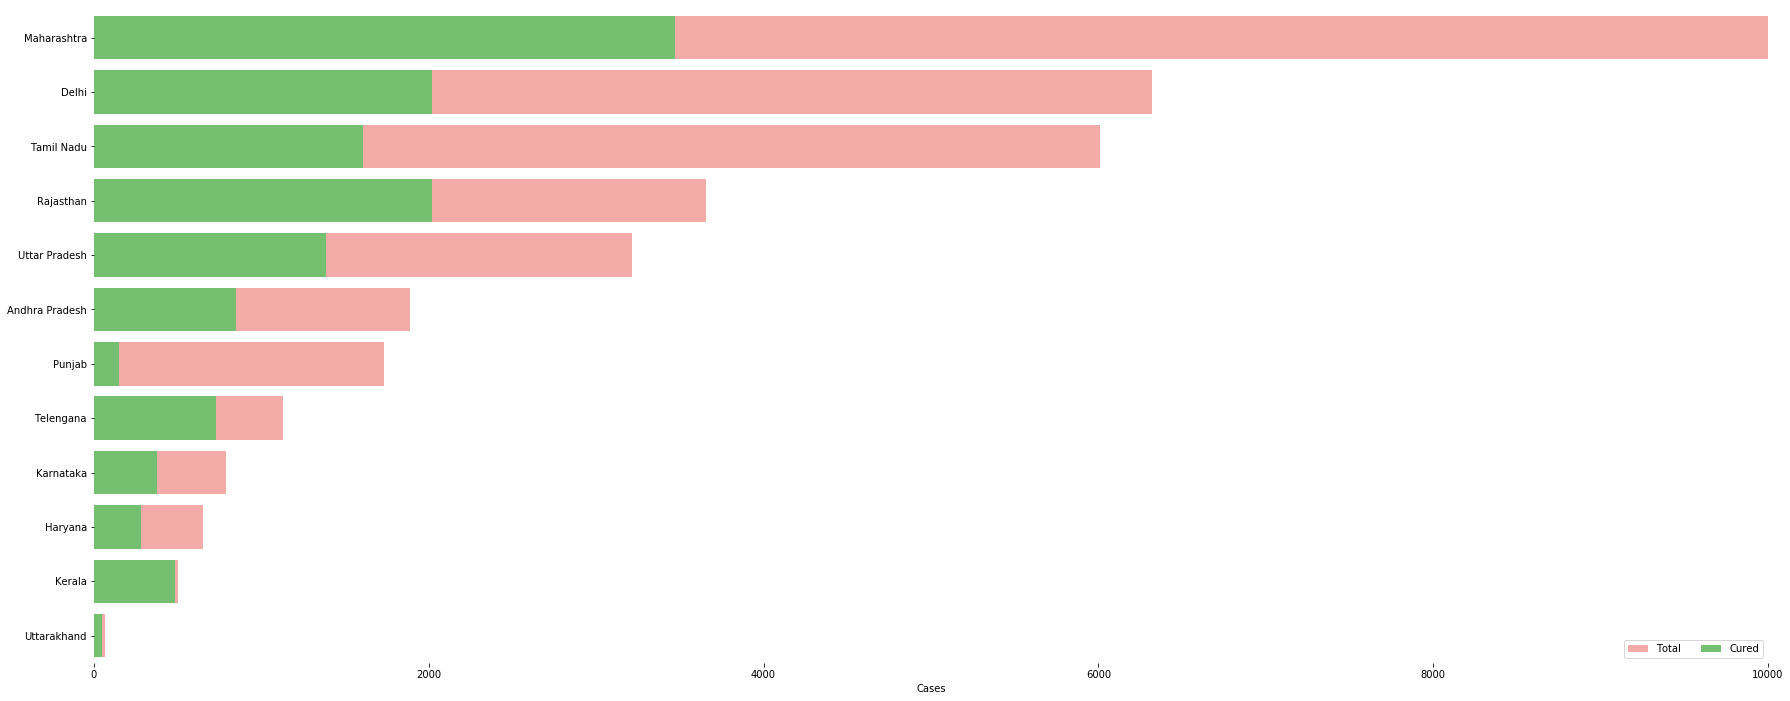

In [35]:
#Learn how to use Seaborn for visualization
f, ax = plt.subplots(figsize=(30, 12))
data = df_full[['Name of State / UT','Total_Confirmed_cases ','Cured','Death']]
data.sort_values('Total_Confirmed_cases ',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total_Confirmed_cases ", y="Name of State / UT", data=data,label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color="g")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,10000), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

### How the Coronavirus cases are rising?

In [39]:
#Learn how to create interactive graphs using plotly
# import plotly.graph_objects as go
# Rise of COVID-19 cases in India
fig = go.Figure()
fig.add_trace(go.Scatter(x=dd_India['date'], y = dd_India['total_cases'], mode='lines+markers',name='total_cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230,230,230)')
fig.show()

# New COVID-19 cases reported daily in India

import plotly.express as px
fig = px.bar(dd_India, x="date", y="new_cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230,230,230)')

fig.show()

### Is the trend similar to Italy/ S.Korea/ Spain/USA?

#### Cumulative cases in India, Italy, S.Korea, Spain and USA

In [42]:
# import plotly.express as px
fig = px.bar(dd_India, x="date", y="total_cases", color='total_cases', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dd_Italy, x="date", y="total_cases", color='total_cases', orientation='v', height=600,
             title='Confirmed Cases in Italy', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dd_South_Korea, x="date", y="total_cases", color='total_cases', orientation='v', height=600,
             title='Confirmed Cases in South Korea', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dd_Spain, x="date", y="total_cases", color='total_cases', orientation='v', height=600,
             title='Confirmed Cases in Spain', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dd_United_States , x="date", y="total_cases", color='total_cases', orientation='v', height=600,
             title='Confirmed Cases in United Sates', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

<b>Visualization Inference</b>

<li>Confirmed cases in India is rising exponentially.
<li>Confirmed cases in Italy and United States is now coming less.
<li>Spain also isnow not having lots of cases and 7th May does not have any cases.
<li>S.Korea has almost controlled cases as only few cases are coming everyday.
<li>There has been only 40 confirmed cases in South Korea since last week. They have almost controlled the COVID-19

### Forecasting Total Number of Cases Worldwide

#### Prophet
Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

We use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

##### Why Prophet?
<li>Accurate and fast: Prophet is used in many applications across Facebook for producing reliable forecasts for planning and goal setting. Facebook finds it to perform better than any other approach in the majority of cases. It fit models in Stan so that you get forecasts in just a few seconds.

<li>Fully automatic: Get a reasonable forecast on messy data with no manual effort. Prophet is robust to outliers, missing data, and dramatic changes in your time series.

<li>Tunable forecasts: The Prophet procedure includes many possibilities for users to tweak and adjust forecasts. You can use human-interpretable parameters to improve your forecast by adding your domain knowledge

<li>Available in R or Python: Facebook has implemented the Prophet procedure in R and Python. Both of them share the same underlying Stan code for fitting. You can use whatever language you’re comfortable with to get forecasts.

In [45]:
from fbprophet import Prophet

In [46]:
confirmed = dd.groupby('date').sum()['total_cases'].reset_index()
deaths = dd.groupby('date').sum()['total_deaths'].reset_index()

In [47]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [48]:
confirmed.tail()

,ds,y
125,2020-05-04,6935398
126,2020-05-05,7090276
127,2020-05-06,7248882
128,2020-05-07,7206367
129,2020-05-08,7615008


### Forecasting Confirmed NCOVID-19 Cases Worldwide with Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [49]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
132,2020-05-11
133,2020-05-12
134,2020-05-13
135,2020-05-14
136,2020-05-15


The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [50]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
132,2020-05-11,8.016170e+06,7.969101e+06,8.059046e+06
133,2020-05-12,8.168532e+06,8.115372e+06,8.220179e+06
134,2020-05-13,8.324901e+06,8.249697e+06,8.396297e+06
135,2020-05-14,8.472146e+06,8.381674e+06,8.562544e+06
136,2020-05-15,8.646979e+06,8.530296e+06,8.745451e+06


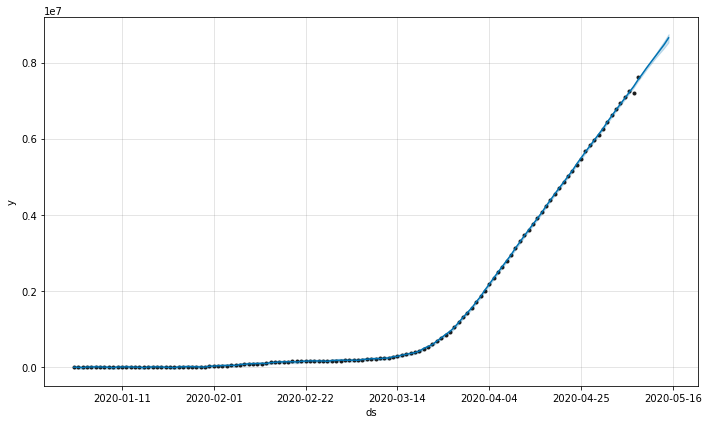

In [51]:
confirmed_forecast_plot = m.plot(forecast)

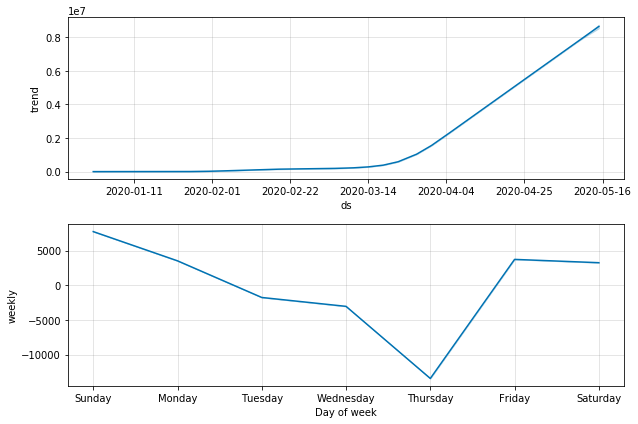

In [52]:
confirmed_forecast_plot =m.plot_components(forecast)

### Forecasting Worldwide Deaths using Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [53]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [54]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
132,2020-05-11
133,2020-05-12
134,2020-05-13
135,2020-05-14
136,2020-05-15


In [55]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
132,2020-05-11,586274.996838,575616.223680,597024.563115
133,2020-05-12,598054.633709,587932.789659,608653.654407
134,2020-05-13,610853.540049,600072.816822,621206.673078
135,2020-05-14,622412.714017,611049.274900,633594.049746
136,2020-05-15,636604.308530,622682.069664,648197.240984


In [58]:
forecast.shape

(137, 16)

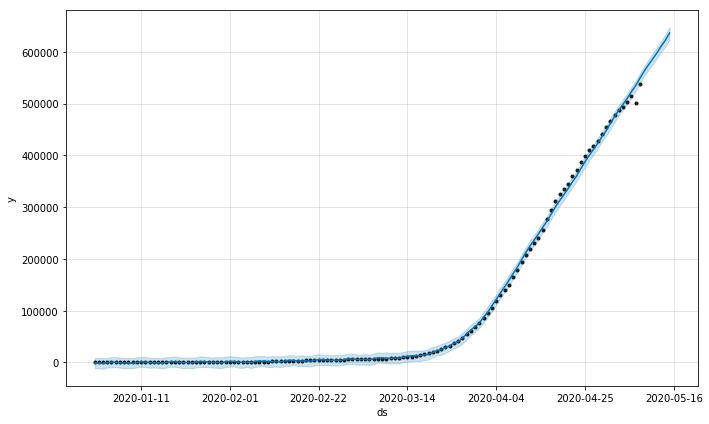

In [56]:
deaths_forecast_plot = m.plot(forecast)

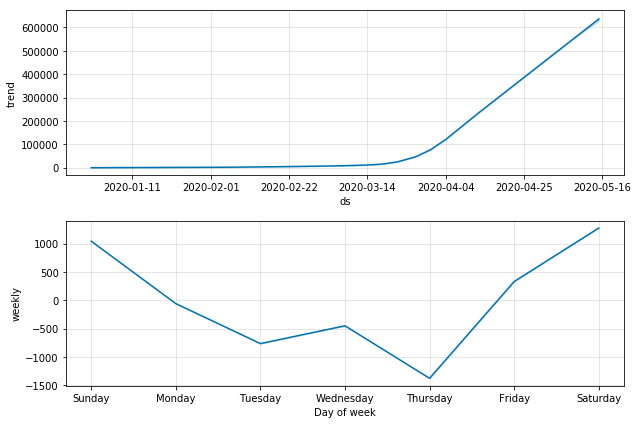

In [57]:
deaths_forecast_plot = m.plot_components(forecast)

### Inference from the above Analysis and Forecast

Will Indian become the next Italy/ Spain/ United States?

Yes, if you look at the world's data and its forecast you can say that India might face one of its worst days.Cases in Maharashtra and Gujrat can get even worst. It is high time for medical officials to do more and more test.

Each and every person in Asia's biggest slum, Dharavi, should be tested as there is more chaches of getting community transmission. 

And people in rural are more likely to get affected because of lack ofawareness and should be monitors regularly.